# Biodiversity in National Parks

## Introduction

The objective of this project is to examine biodiversity information obtained from the National Parks Service, focusing on diverse species identified in distinct national park sites.
This project will scope, analyze, prepare, plot data, and seek to explain the findings from the analysis.

This project has aimed to address the following inquiries:

- How is the conservation status of species distributed?
- Is there a higher likelihood of endangerment for particular types of species?
- Are the variances in conservation status among species statistically significant?
- What is the predominant animal species and how is its distribution spread across national parks?

### Project Goals

This project will approach the subject matter from the standpoint of a biodiversity analyst working for the National Parks Service. The National Park Service is committed to preserving endangered species and maintaining a diverse ecosystem within their parks. Consequently, the primary goals of the analyst will involve investigating attributes related to the species and their conservation status, as well as examining the relationship between these species and the national parks.

### Data

This project has two data sets that came with the package. The first `csv` file has information about each species and another has observations of species with park locations. This data will be used to analyze the goals of the project. 

### Analysis

IThis section will involve utilizing descriptive statistics and data visualization tools to gain a better understanding of the data. Additionally, statistical inference techniques will be employed to determine whether the observed values are statistically significant or occurred by chance.

### Evaluation

Finally, it is advisable to review the initial project objectives and confirm whether the analysis results correspond to the original questions. This section will also discuss the insights gained during the analytical process, and identify any questions that were left unanswered. Additionally, it may include limitations encountered during the analysis, and discuss whether alternative methodologies could have been employed to achieve more robust results.


## Import Python Modules

First, import the primary modules that will be used in this project:

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency
from itertools import chain
import string

%matplotlib inline

## Loading the Data

#### species

The dataset **species_info.csv** comprises details regarding the various species within the National Parks. The columns in this dataset include:
- **category** - The category of taxonomy for each species
- **scientific_name** - The scientific name of each species
- **common_names** - The common names of each species
- **conservation_status** - The species conservation status


In [2]:
species = pd.read_csv('species_info.csv')
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


#### observations

The dataset **observations.csv** includes information obtained from sightings of different species throughout the national parks in the past seven days. The columns in this dataset include:

- **scientific_name** - The scientific name of each species
- **park_name** - The name of the national park
- **observations** - The number of observations in the past 7 days

In [3]:
observations = pd.read_csv('observations.csv')
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


## Explore the Data

#### observations

In [4]:
observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


We observe that there are no null values in this dataset, which consists of 23 296 rows and three columns. Moreover, it contains only one numerical variable.

In [5]:
observations.scientific_name.nunique()

5541

There are a total of 5541 unique scientific names in the dataset, although there are more rows. However, it is evident that certain species can be present in different parks.

In [6]:
print(observations.park_name.nunique())
print(observations.park_name.unique())

4
['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


The dataset contains information regarding these national parks.

In [7]:
observations.park_name.value_counts()

Great Smoky Mountains National Park    5824
Yosemite National Park                 5824
Bryce National Park                    5824
Yellowstone National Park              5824
Name: park_name, dtype: int64

Each park is mentioned an equal number of times in the dataset.

In [8]:
observations.observations.sum()

3314739

Over the course of a week, a total of 3 314 739 observations were conducted.

In [9]:
observations.groupby('park_name').observations.sum()

park_name
Bryce National Park                     576025
Great Smoky Mountains National Park     431820
Yellowstone National Park              1443562
Yosemite National Park                  863332
Name: observations, dtype: int64

The largest number of observations was recorded in the Yellowstone National Park, while the smallest number was recorded in the Great Smoky Mountains National Park.

#### species

In [10]:
species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


We observe that there are no null values in this dataset, which consists of 5 824 rows and four columns.

In [11]:
species.isna().sum()

category                  0
scientific_name           0
common_names              0
conservation_status    5633
dtype: int64

In [12]:
print(species.conservation_status.nunique())
print(species.conservation_status.unique())

4
[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


In [13]:
species.groupby("conservation_status").size()

conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64

Next a count of the number of observations in the breakdown of the categories in conservation_status is done. There are 5 633 nan values which means that they are species without concerns. On the other hand there are 161 species of concern, 16 endangered, 10 threatened, and 4 in recovery.

In [14]:
print(species.category.nunique())
print(species.category.unique())

7
['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


The number of category that are represented in the data and there are 7 including animals and plants.

In [15]:
species.category.value_counts()

Vascular Plant       4470
Bird                  521
Nonvascular Plant     333
Mammal                214
Fish                  127
Amphibian              80
Reptile                79
Name: category, dtype: int64

It is worth noting that vascular plants comprise the majority of species, with a total count of 4 470, while reptiles have the smallest count, with only 79 species represented in the data.

In [16]:
species.scientific_name.nunique()

5541

We can note that the number of scientific species is equal across each of the datasets.

In [17]:
species.common_names.nunique()

5504

The number of common names is slightly lower.

In [18]:
park_count = observations.groupby('park_name')['observations'].mean()

category_count = species.category.value_counts()

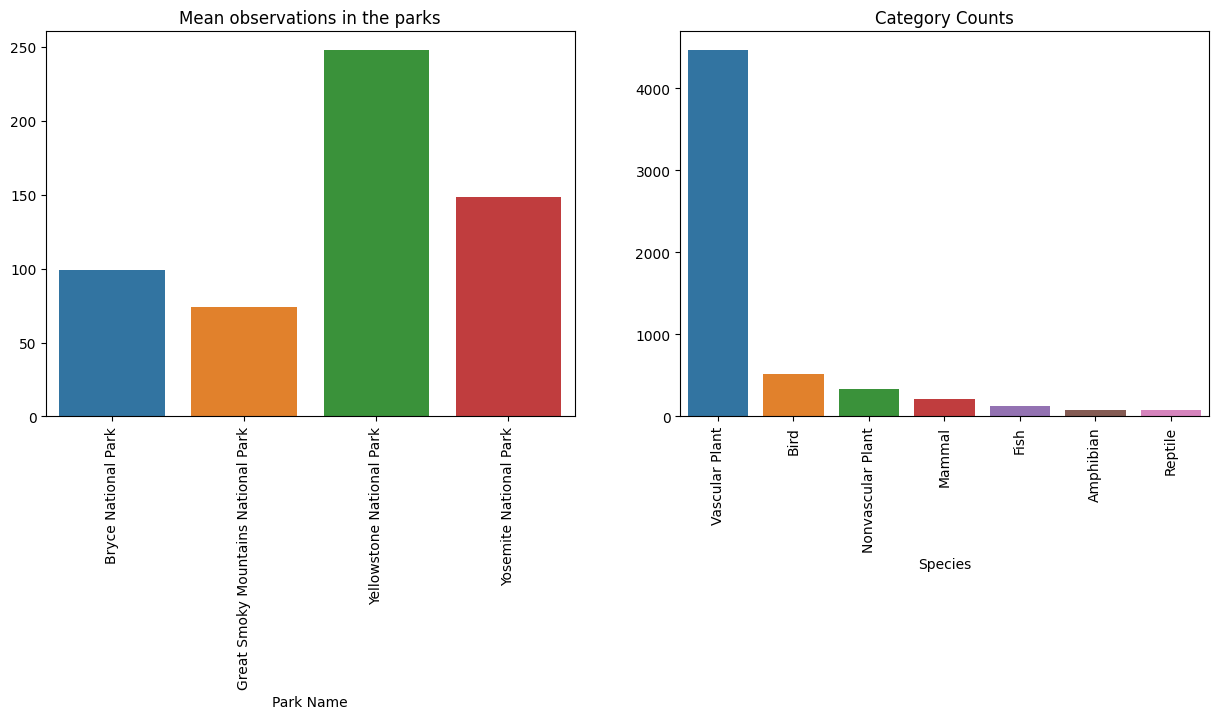

In [19]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.barplot(x=park_count.index, y=park_count.values)
plt.xticks(rotation=90)
plt.xlabel('Park Name')
plt.title('Mean observations in the parks')

plt.subplot(1, 2, 2)
sns.barplot(x=category_count.index, y=category_count.values)
plt.xticks(rotation=90)
plt.xlabel('Species')
plt.title('Category Сounts')

plt.show()

On the left chart, we can observe the average number of observations across each of the four parks, while on the right chart, we can see the total count of each species observed.

## Analysis

#### Conservation status

In [20]:
species.fillna('No Intervention', inplace=True)
species.groupby("conservation_status").size()

conservation_status
Endangered              16
In Recovery              4
No Intervention       5633
Species of Concern     161
Threatened              10
dtype: int64

The initial task is to analyze and tidy up the conservation_status column in the species dataset. This column contains various potential values, including:

- Species of Concern: indicating a declining species or a species that seems to require conservation attention
- Threatened: referring to a species that is vulnerable to being endangered in the near future
- Endangered: indicating a species that is seriously at risk of extinction
- In Recovery: indicating a species that was previously Endangered but is now not at risk of extinction throughout all or a significant portion of its range.

During the exploration, it was discovered that numerous values in this column were marked as nan. These values will need to be replaced with No Intervention.

In [21]:
conservationCategory = species[species.conservation_status != "No Intervention"]\
    .groupby(["conservation_status", "category"])['scientific_name']\
    .count()\
    .unstack()

conservationCategory

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


The next step is to examine the distinct categories within the conservation_status column, excluding those that do not necessitate an intervention. A table and graph are provided below for analysis.

Regarding the Endangered status, there were 7 mammal species and 4 bird species. In contrast, concerning the In Recovery status, there were 3 bird species and 1 mammal species. This result suggests that birds may be rebounding more successfully than mammals.

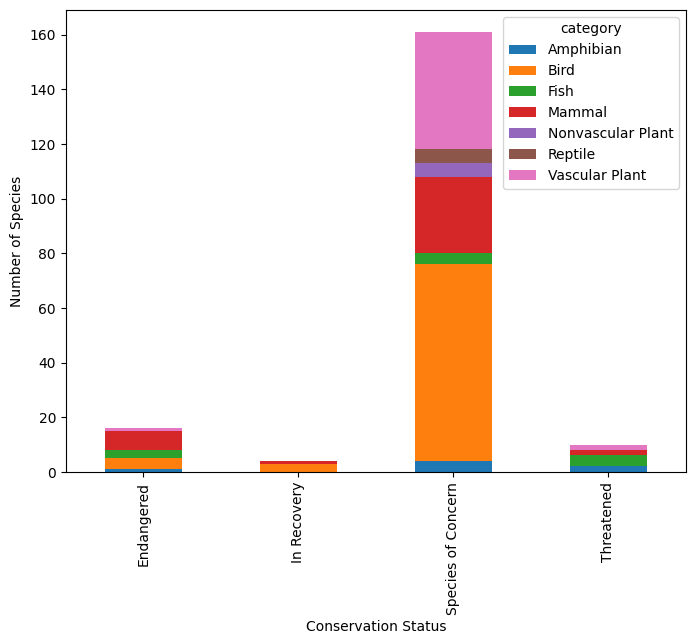

In [22]:
ax = conservationCategory.plot(kind = 'bar', figsize=(8,6), stacked=True)
ax.set_xlabel("Conservation Status")
ax.set_ylabel("Number of Species")
plt.show()

#### In conservation

In [23]:
species['is_protected'] = species.conservation_status != 'No Intervention'

The subsequent inquiry is whether certain species are more prone to be endangered. To answer this question, a new column called is_protected will be generated. Any species with a value other than No Intervention in the conservation_status column will be included in this column.

In [24]:
category_counts = species.groupby(['category', 'is_protected'])\
                        .scientific_name.nunique()\
                        .reset_index()\
                        .pivot(columns='is_protected',
                                      index='category',
                                      values='scientific_name')\
                        .reset_index()
category_counts.columns = ['category', 'not_protected', 'protected']

category_counts

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


After creating the new is_protected column, the data can be grouped by category and is_protected to exhibit the breakdown of each species type and its protection status. The result demonstrates that Birds, Vascular Plants, and Mammals have a greater number of protected species.

In [25]:
category_counts['percent_protected'] = category_counts.protected /(category_counts.protected + category_counts.not_protected) * 100

category_counts

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


It is essential to compute the protection rate of each category in the data since absolute numbers may not always be the most informative statistic. By conducting this analysis, it becomes apparent that roughly 17 percent of mammal species and approximately 15 percent of bird species were under protection.

#### Statistical Significance

The first test will be called contingency1 and will need to be filled with the correct numbers for mammals and birds.

In [26]:
contingency_table1 = category_counts[(category_counts.category == 'Bird')\
                | (category_counts.category == 'Mammal')]\
                .reset_index()
contingency_table1 = contingency_table1[['category', 'not_protected', 'protected']]
contingency_table1

,category,not_protected,protected
0,Bird,413,75
1,Mammal,146,30


In [27]:
contingency1 = [[413, 75],
              [146, 30]]
chi2_contingency(contingency1)

Chi2ContingencyResult(statistic=0.16170148316545574, pvalue=0.6875948096661336, dof=1, expected_freq=array([[410.8313253,  77.1686747],
       [148.1686747,  27.8313253]]))

The results from the chi-squared test returns many values, the second value which is 0.69 is the p-value. The standard p-value to test statistical significance is 0.05. For the value retrieved from this test, the value of 0.69 is much larger than 0.05. In the case of mammals and birds there doesn't seem to be any significant relationship between them i.e. the variables independent. 

The next pair, is going to test the difference between Reptile and Mammal.

In [28]:
contingency_table2 = category_counts[(category_counts.category == 'Reptile')\
                | (category_counts.category == 'Mammal')]\
                .reset_index()
contingency_table2 = contingency_table2[['category', 'not_protected', 'protected']]
contingency_table2

,category,not_protected,protected
0,Mammal,146,30
1,Reptile,73,5


In [29]:
contingency2 = [[146, 30],
               [73, 5]]
chi2_contingency(contingency2)

Chi2ContingencyResult(statistic=4.289183096203645, pvalue=0.03835559022969898, dof=1, expected_freq=array([[151.7480315,  24.2519685],
       [ 67.2519685,  10.7480315]]))

This time the p-value is 0.039 which is below the standard threshold of 0.05 which can be take that the difference between reptile and mammal is statistically significant. Mammals are shown to have a statistically significant higher rate of needed protection compared with Reptiles. 

#### Species in Parks

The upcoming analysis will be based on data collected by conservationists who have been documenting sightings of various species in multiple national parks over the last week.

In [30]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

common_names = species[species.category == "Mammal"]\
    .common_names\
    .apply(remove_punctuations)\
    .str.split().tolist()

common_names[:10]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison', 'Bison'],
 ['Aurochs',
  'Aurochs',
  'Domestic',
  'Cattle',
  'Feral',
  'Domesticated',
  'Cattle'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Sheep', 'Sheep', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer'],
 ['Feral', 'Hog', 'Wild', 'Pig'],
 ['Coyote'],
 ['Gray', 'Wolf'],
 ['Red', 'Wolf']]

To gain an understanding of the most common animals in the dataset, examine the common names listed in the species column. It was necessary to separate the data into individual names.

In [31]:
clean_rows = []

for item in common_names:
    item = list(dict.fromkeys(item))
    clean_rows.append(item)
    
clean_rows[:10]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison'],
 ['Aurochs', 'Domestic', 'Cattle', 'Feral', 'Domesticated'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer'],
 ['Feral', 'Hog', 'Wild', 'Pig'],
 ['Coyote'],
 ['Gray', 'Wolf'],
 ['Red', 'Wolf']]

Removed any duplicate words within each row as they should not be counted more than once for each species.

In [32]:
res = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in clean_rows))
res[:10]

['Gappers',
 'RedBacked',
 'Vole',
 'American',
 'Bison',
 'Aurochs',
 'Domestic',
 'Cattle',
 'Feral',
 'Domesticated']

The words is collapsed into one list for easier use.

In [33]:
words_counted = []

for i in res:
    x = res.count(i)
    words_counted.append((i,x))

pd.DataFrame(set(words_counted), columns =['Word', 'Count']).sort_values("Count", ascending = False).head(10)

,Word,Count
50,Bat,23
25,Shrew,18
66,Myotis,17
59,Mouse,16
141,Chipmunk,13
107,Squirrel,12
118,American,12
191,Vole,11
24,Eastern,11
194,Mountain,10


After analyzing the data, it appears that the word Bat was encountered 23 times, while the word Shrew was found 18 times.

In [34]:
species['is_bat'] = species.common_names.str.contains(r"\bBat\b", regex = True)

species.head(10)

,category,scientific_name,common_names,conservation_status,is_protected,is_bat
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False,False
5,Mammal,Odocoileus virginianus,White-Tailed Deer,No Intervention,False,False
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",No Intervention,False,False
7,Mammal,Canis latrans,Coyote,Species of Concern,True,False
8,Mammal,Canis lupus,Gray Wolf,Endangered,True,False
9,Mammal,Canis rufus,Red Wolf,Endangered,True,False


Within the dataset, various scientific names are used to refer to different bat species. The next step is to identify the rows in the species column that pertain to bats. To achieve this, a new column consisting of boolean values will be generated to indicate whether a given row pertains to a bat, where True indicates that the row pertains to a bat.

In [35]:
species[species.is_bat]

,category,scientific_name,common_names,conservation_status,is_protected,is_bat
28,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,No Intervention,False,True
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,True,True
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern,True,True
31,Mammal,Lasiurus borealis,"Eastern Red Bat, Red Bat",No Intervention,False,True
32,Mammal,Lasiurus cinereus,Hoary Bat,No Intervention,False,True
36,Mammal,Myotis leibii,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
37,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Species of Concern,True,True
38,Mammal,Myotis septentrionalis,"Northern Long-Eared Bat, Northern Myotis",Threatened,True,True
39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
40,Mammal,Nycticeius humeralis,Evening Bat,No Intervention,False,True


The following is a subset of the data where the is_bat column is True, displaying only the rows that match. The dataset appears to contain a wide range of bat species, some of which are protected and others that are not.

In [36]:
bat_observations = observations.merge(species[species.is_bat])
bat_observations

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_bat
0,Lasiurus blossevillii,Bryce National Park,113,Mammal,Western Red Bat,Species of Concern,True,True
1,Lasiurus blossevillii,Great Smoky Mountains National Park,70,Mammal,Western Red Bat,Species of Concern,True,True
2,Lasiurus blossevillii,Yosemite National Park,123,Mammal,Western Red Bat,Species of Concern,True,True
3,Lasiurus blossevillii,Yellowstone National Park,221,Mammal,Western Red Bat,Species of Concern,True,True
4,Corynorhinus rafinesquii,Yosemite National Park,188,Mammal,Rafinesque's Big-Eared Bat,No Intervention,False,True
...,...,...,...,...,...,...,...,...
139,Myotis sodalis,Yellowstone National Park,68,Mammal,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
140,Myotis leibii,Yosemite National Park,132,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
141,Myotis leibii,Bryce National Park,84,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
142,Myotis leibii,Great Smoky Mountains National Park,49,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True


We have merged the results of the identified bat species with the observations dataset, to generate a new DataFrame that contains observations of bats across all four national parks.

In [37]:
bat_observations.groupby('park_name').observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,3433
1,Great Smoky Mountains National Park,2411
2,Yellowstone National Park,8362
3,Yosemite National Park,4786


The table shows the total count of bat observations, encompassing all bat species, in each of the four national parks over the last 7 days. It appears that Yellowstone National Park has the highest number of bat observations, with a total count of 8 362, while the Great Smoky Mountains National Park has the lowest count, with 2 411 observations.

In [38]:
obs_by_park = bat_observations.groupby(['park_name', 'is_protected']).observations.sum().reset_index()
obs_by_park

,park_name,is_protected,observations
0,Bryce National Park,False,1596
1,Bryce National Park,True,1837
2,Great Smoky Mountains National Park,False,1299
3,Great Smoky Mountains National Park,True,1112
4,Yellowstone National Park,False,4044
5,Yellowstone National Park,True,4318
6,Yosemite National Park,False,2345
7,Yosemite National Park,True,2441


We have examined the observations for each park categorized into sightings of protected bats versus non-protected bats. It appears that, with the exception of the Great Smoky Mountains National Park, all the other parks have more sightings of protected bats than non-protected ones. This could be considered a positive indicator for bat conservation efforts.

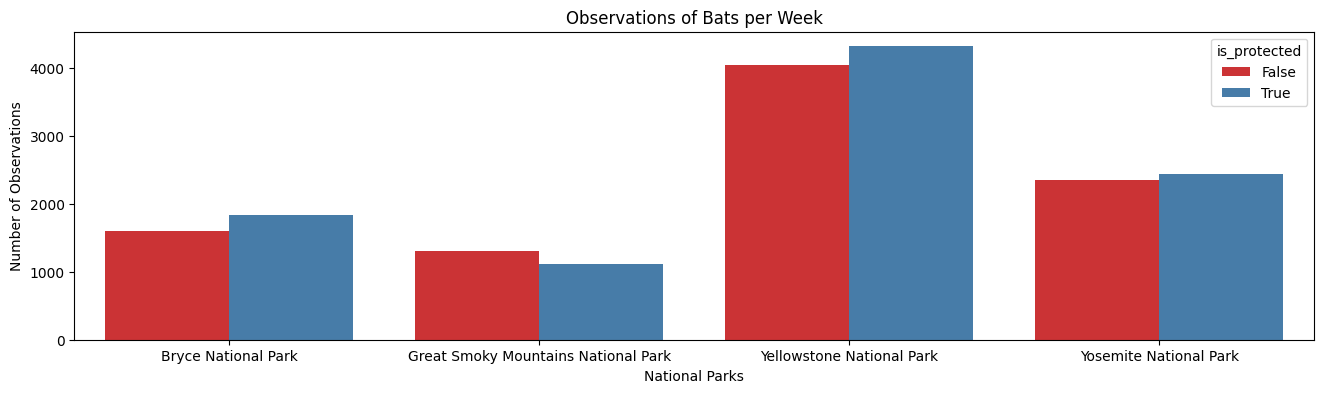

In [39]:
plt.figure(figsize=(16, 4))
sns.barplot(x=obs_by_park.park_name, y= obs_by_park.observations, hue=obs_by_park.is_protected, palette='Set1')
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.title('Observations of Bats per Week')
plt.show()

The provided plot showcases the results of the previous data manipulation, and it indicates that Yellowstone and Bryce National Parks are showing positive signs for bat conservation efforts, with more sightings of protected bat species compared to non-protected ones. On the other hand, the Great Smoky Mountains National Park seems to have a higher count of non-protected bat species, suggesting that they might need to intensify their conservation efforts.

## Conclusions

In conclusion, this project was able to generate several data visualizations and conclusions regarding the species found in four National Parks. 

The analysis was able to answer the initial questions posed at the start of the project, indicating that most species were not part of conservation efforts, mammals and birds were more likely to be in protection, and that mammals and reptiles had a statistically significant difference in conservation status.

Additionally, bats were the most prevalent species, and Yellowstone National Park had the highest likelihood of observing them. 

Overall, this analysis provides valuable insights into the conservation efforts of various species across National Parks.

### Thank you for attention!